In [14]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size,layers[0]) 
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2 
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        #Store the outputs of each layer for back-propagation
        self.activation_outputs = (a1,a2,y_)
        
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        
        dw3 = np.dot(a2.T,delta3) #)h2+1,C) => (h2+1,m) X (m,C) 
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)  #(m,h2+1) => (m,h2+1) *(m,C X C,h2+1)
        dw2 = np.dot(a1.T,delta2)  
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T) 
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        self.model['W1'] -= learning_rate*dw1
        self.model['W2'] -= learning_rate*dw2
        self.model['W3'] -= learning_rate*dw3
        
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
        
        
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [15]:
def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea,axis=1,keepdims=True)


In [16]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l    

def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    return y_oht

In [17]:
import numpy as np

In [18]:
model = NeuralNetwork(input_size=2,layers=[4,3],output_size=2)

In [19]:
def train(X,Y,model,epochs,logs=True):
    """Creates and Model and Trains it!"""
    
    training_loss = []
    val_loss = []
    val_acc = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        model.backward(X,Y_OHT)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l),end='\n')
    
    #model.summary()

In [20]:
from sklearn.datasets import make_circles

In [21]:
X,Y=make_circles(n_samples=500,random_state=1,noise=.05,factor=0.8,shuffle=True)


In [22]:
train(X,Y,model,10000)

Epoch 0 Loss 0.9046
Epoch 50 Loss 0.3360
Epoch 100 Loss 0.3214
Epoch 150 Loss 0.3059
Epoch 200 Loss 0.2964
Epoch 250 Loss 0.2861
Epoch 300 Loss 0.2752
Epoch 350 Loss 0.2675
Epoch 400 Loss 0.2608
Epoch 450 Loss 0.2536
Epoch 500 Loss 0.2455
Epoch 550 Loss 0.2382
Epoch 600 Loss 0.2323
Epoch 650 Loss 0.2260
Epoch 700 Loss 0.2218
Epoch 750 Loss 0.2192
Epoch 800 Loss 0.2182
Epoch 850 Loss 0.2182
Epoch 900 Loss 0.2175
Epoch 950 Loss 0.2156
Epoch 1000 Loss 0.2124
Epoch 1050 Loss 0.2082
Epoch 1100 Loss 0.2054
Epoch 1150 Loss 0.1330
Epoch 1200 Loss 0.1275
Epoch 1250 Loss 0.1257
Epoch 1300 Loss 0.1448
Epoch 1350 Loss 0.1388
Epoch 1400 Loss 0.1316
Epoch 1450 Loss 0.1252
Epoch 1500 Loss 0.1191
Epoch 1550 Loss 0.1127
Epoch 1600 Loss 0.1068
Epoch 1650 Loss 0.1025
Epoch 1700 Loss 0.0988
Epoch 1750 Loss 0.0951
Epoch 1800 Loss 0.0922
Epoch 1850 Loss 0.0898
Epoch 1900 Loss 0.0879
Epoch 1950 Loss 0.0863
Epoch 2000 Loss 0.0849
Epoch 2050 Loss 0.0836
Epoch 2100 Loss 0.0824
Epoch 2150 Loss 0.0813
Epoch 2200 

In [10]:
import matplotlib.pyplot as plt

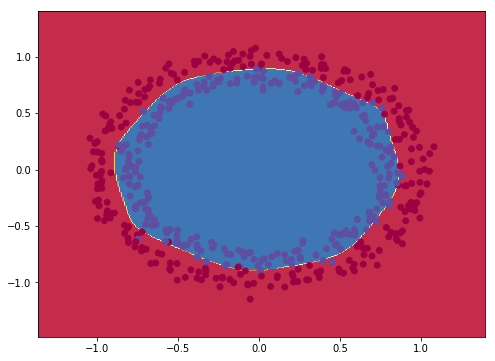

In [31]:
def plot_decision_boundary(model,X,Y):
    padding=0.15
    res=0.01
    
    x_min,x_max=X[:,0].min(), X[:,0].max()
    y_min,y_max=X[:,1].min(), X[:,1].max()
    
    x_range=x_max-x_min
    y_range=y_max-y_min
    
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    #create a meshgrid of points with the above ranges
    xx,yy=np.meshgrid(np.arange(x_min,x_max,res),np.arange(y_min,y_max,res))
    
    #use model to predict class at each point on the grid
    #ravel turns the 2d arrays into vectors
    #c_ concatenates the vectors to create one long vector on which to perform prediction
    #finally the vector of prediction is reshaped to the original data shape.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])   
    Z = Z.reshape(xx.shape)
    
    #plot the contours on the grid
    plt.figure(figsize=(8,6))
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    
    #plot the original data and labels
    plt.scatter(X[:,0], X[:,1], s=35, c=Y, cmap=plt.cm.Spectral)
plot_decision_boundary(model,X,Y)

In [23]:
outputs = model.predict(X)
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 95.6000
